In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

import pandas as pd
from pyvis.network import Network

In [10]:
node_df = pd.read_csv("node.csv")
edge_df = pd.read_csv("edge.csv")

nt = Network('500px','500px')

In [3]:
node_df.head(5)

,new_id,screen_name,List,name,description,url,followers_count,friends_count,created_at,location,id
0,0,_evefee_,initial,อีฟฟี่ 92🔝,ชอบคสอ.💄ชอบของกิน🍩ชอบแมว🐱 ig @_evefee_ // ติดต...,https://t.co/NplvqoAJ6p,59468,242,Thu Apr 21 12:53:42 +0000 2016,Bkk,7.230000e+17
1,1,Architastation,initial,อาชิตา,0,https://t.co/HZxElMk5E5,93355,124,Wed Nov 11 14:26:59 +0000 2009,Thailand,8.919560e+07
2,2,bew_varaporn,initial,Bew Varaporn,Hello :),https://t.co/39nwCzvm1g,3835,55,Tue Aug 14 07:52:44 +0000 2018,Thailand,1.030000e+18
3,3,BlacklistSecret,initial,BLACKLIST.SECRET,📷 ig: Blacklist.secret / Your support Sister 🖤...,https://t.co/RSijQecD7j,147502,1218,Tue Jun 13 06:45:36 +0000 2017,Thailand,8.750000e+17
4,4,brinkkty,initial,Brinkkty,To improve is to change :),0,115173,82,Sun Aug 06 16:41:25 +0000 2017,0,8.940000e+17


In [4]:
edge_df.head(5)

,user,following
0,0,102
1,0,17
2,0,51
3,0,47
4,0,30


In [5]:
len(edge_df)

9210

In [6]:
node_list = node_df.new_id.values

In [7]:
G = nx.Graph()

In [8]:
G.add_nodes_from(node_list)

for i in range(len(edge_df)):
    G.add_edge(edge_df.user.values[i],edge_df.following.values[i])

In [9]:
n = G.number_of_nodes()
m = G.number_of_edges()

print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :", str(nx.number_connected_components(G)))


Number of nodes : 121
Number of edges : 5451
Number of connected components : 1


In [ ]:
plt.figure(figsize=(20,10))
nx.draw(G)

In [11]:
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

/var/folders/y8/1g3ffxtj5bl6btf8w5y73r_00000gn/T/ipykernel_12092/3185659353.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))


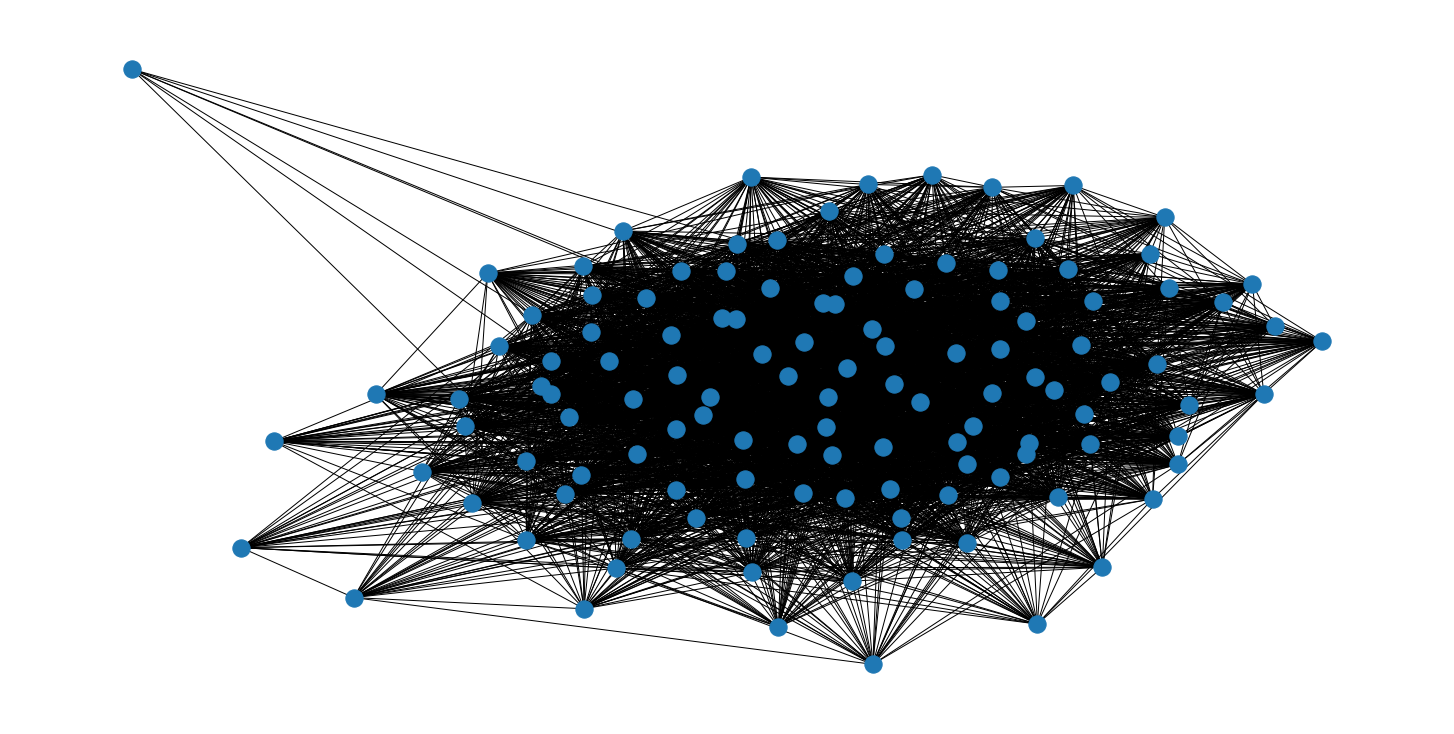

In [12]:
plt.figure(figsize=(20,10))
nx.draw(G_train)

In [13]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))

Deleted :  1362
Remaining :  4089


***Jaccard Coefficient***

In [14]:
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

***Adamic-Adar***

In [15]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

***Preferential Attachment***

In [32]:
prediction_pref = list(nx.preferential_attachment(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

***ด้านล่าง ทำเพิ่มเติมเพื่อดูผลลัพท์เฉยๆนะครับ***

***Node2Vec***

In [18]:
from node2vec import Node2Vec

In [19]:
node2vec = Node2Vec(G_train, dimensions=64, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/121 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:01<00:00, 41.35it/s]


In [20]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [25]:
model.wv.get_vector('0')

array([-0.10200167, -0.02638501,  0.24068907,  0.03693939,  0.20924672,
       -0.02763839,  0.01907728, -0.09604506, -0.11995477,  0.0183067 ,
       -0.11223051, -0.28624532, -0.06226197, -0.13321638,  0.01624304,
       -0.04771326,  0.15784064,  0.09994159,  0.02778422, -0.04388666,
        0.10124221,  0.16473965,  0.07224049,  0.01652648,  0.16488881,
       -0.05947314, -0.14761569, -0.23329587,  0.0291071 ,  0.15476792,
       -0.10904814, -0.04244357, -0.10400291, -0.20915064, -0.2528716 ,
       -0.10329109, -0.10789446, -0.09503938, -0.10045772,  0.0233409 ,
        0.06031388, -0.12749644,  0.14456484, -0.24665692, -0.04724339,
       -0.06094824,  0.16938984,  0.14647636,  0.02847032,  0.2512132 ,
        0.08135677, -0.11805999,  0.12571567,  0.2516794 ,  0.05595962,
        0.02455093, -0.1259082 , -0.05683653,  0.02211899, -0.05490977,
        0.0249563 , -0.2272246 ,  0.12667482,  0.03442558], dtype=float32)

In [26]:
model.wv.most_similar('0')

[('22', 0.4797593653202057),
 ('45', 0.454208105802536),
 ('27', 0.4444185495376587),
 ('91', 0.44300347566604614),
 ('47', 0.44132256507873535),
 ('7', 0.4247150719165802),
 ('20', 0.4201686680316925),
 ('18', 0.4142327606678009),
 ('3', 0.411233514547348),
 ('25', 0.4074859619140625)]

***Edge Embedding***

In [27]:
from node2vec.edges import HadamardEmbedder

In [28]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [29]:
edges_embs[('0', '1')]


array([ 0.00177088,  0.0041578 , -0.01984899,  0.00928705,  0.00904283,
       -0.0029557 , -0.00136908,  0.00677103,  0.0229783 ,  0.00021582,
        0.00368989,  0.04730461,  0.00942536, -0.00752974,  0.00251827,
        0.00240562,  0.03752107,  0.01693675, -0.00375658,  0.00050121,
        0.01243233,  0.00753678,  0.0162599 , -0.00237967, -0.00174343,
       -0.00109946,  0.01985504,  0.0048861 , -0.00121249,  0.00051801,
       -0.00397503,  0.00339788, -0.01185724,  0.01429903,  0.0455794 ,
        0.00708416, -0.00569382,  0.00863905,  0.01645346,  0.00276742,
        0.00709018,  0.02550036, -0.02297031,  0.00743404, -0.00181904,
       -0.00079148,  0.00383905,  0.00421963, -0.00199296,  0.00774851,
       -0.01991198,  0.00638822,  0.03734566,  0.04051924,  0.00361155,
       -0.0049351 , -0.0074127 , -0.00018178,  0.00052511, -0.01052637,
        0.00047751,  0.02494135, -0.00871607,  0.00530536], dtype=float32)

In [30]:
edges_kv = edges_embs.as_keyed_vectors()
edges_kv.most_similar(str(('0', '1')))

Generating edge features: 100%|██████████| 7381/7381.0 [00:00<00:00, 392685.64it/s]


[("('0', '54')", 0.737399160861969),
 ("('0', '22')", 0.7163127064704895),
 ("('0', '47')", 0.6905759572982788),
 ("('0', '74')", 0.6886323094367981),
 ("('54', '74')", 0.6851699352264404),
 ("('1', '54')", 0.6817188262939453),
 ("('1', '47')", 0.6770314574241638),
 ("('1', '32')", 0.674362063407898),
 ("('47', '64')", 0.6702014207839966),
 ("('0', '41')", 0.6699802875518799)]